In [1]:
import numpy as np
import genetic_algorithm
import random

In [2]:
labyrinth = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
            [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
            [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
            [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
            [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
            [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
            [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
            [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
            [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
        ])

In [3]:
def fitness_fun(chromosome, route_idx=None):
    
    route = chromosome.genes

    # Zaczynamy w (1, 1)
    i, j = 1, 1
    position = [0]
    is_problem = 0
    zero_no = 0
    bonus = 0

    for move in route:  # Zmieniamy położenie w zależności od wykonanego ruchu

        if position[-1] == [10, 10] and move == 0:  # bonus za pozostanie w mecie
            bonus += 1
            continue

        if move == 1:
            new_j, new_i = j - 1, i
        elif move == 2:
            new_j, new_i = j + 1, i
        elif move == 3:
            new_i, new_j = i - 1, j
        elif move == 4:
            new_i, new_j = i + 1, j
        else:
            zero_no += 1
            new_i, new_j = i, j

        if 0 <= new_i <= 11 and 0 <= new_j <= 11:
            if labyrinth[new_i, new_j] == 0:
                i, j = new_i, new_j
                position.append([i, j])
                if position.count([i, j]) > 1:  # kara za powtórzenie pozycji
                    is_problem += 1
            else:
                is_problem += 1.25  # kara za zmarnowanie ruchu na odbicie się od ściany

    fitness = ((20 - abs(10 - i) - abs(10 - j)) * 2 - is_problem - zero_no + bonus * 2) / 56

    return fitness

In [5]:
gene_space = [0, 1, 2, 3, 4]
num_generations = 1000
pop_size = 2000
elite_size = 2
num_parents_mating = (pop_size - elite_size) // 2
num_genes = 30

In [6]:
def genome_generator(args):
    """Simple function for generating a given number of randomly sequenced genes"""
    space, amount = args[0], args[1]
    genome = random.choices(population=space, k=amount)
    return genome

In [7]:
population = genetic_algorithm.Population(
    pop_size=pop_size,
    fit_fun=fitness_fun,
    genome_generator=genome_generator,
    args={
        'genome': (gene_space, num_genes),
        'crossover': None,
        'selection': None
    },
    elite_size=elite_size,
    mutation_prob=0.1
)

In [8]:
solutions = []
index = 0

for _ in range(num_generations):
    print("Generation number: {}".format(index))
    index += 1
    population.evaluate_generation()
    print("Population evaluated")
    current_solution = population.best_fit()
    print("Best fit found")
    solutions.append(current_solution)
    population.create_new_generation(
        selection_operator='ranking', 
        crossover_operator='uniform'
    )
    print("New generation created")
    population.mutate()
    print("New generation mutated")
    
    population.reset_parents()
    population.reset_children()

Generation number: 0
Population evaluated
Best fit found
New generation created
New generation mutated
Generation number: 1
Population evaluated
Best fit found
New generation created
New generation mutated
Generation number: 2
Population evaluated
Best fit found
New generation created
New generation mutated
Generation number: 3
Population evaluated
Best fit found
New generation created
New generation mutated
Generation number: 4
Population evaluated
Best fit found
New generation created
New generation mutated
Generation number: 5
Population evaluated
Best fit found
New generation created
New generation mutated
Generation number: 6
Population evaluated
Best fit found
New generation created
New generation mutated
Generation number: 7
Population evaluated
Best fit found
New generation created
New generation mutated
Generation number: 8
Population evaluated
Best fit found
New generation created
New generation mutated
Generation number: 9
Population evaluated
Best fit found
New generation c

In [9]:
print(solutions[-1])

[[2, 2, 4, 3, 2, 4, 4, 3, 2, 2, 2, 3, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 0], 0.59375]


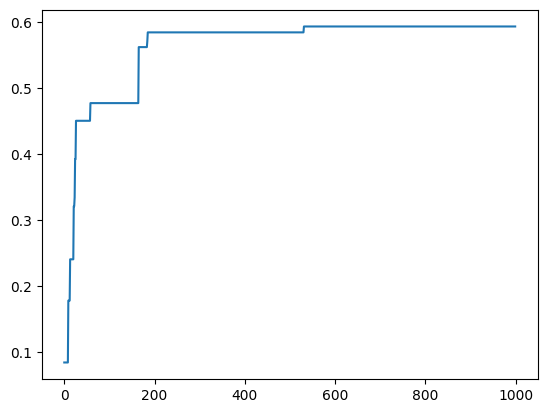

In [10]:
population.fitness_plot()